## Problem Statement:

Vision is responsible for 80-85 percent of our perception of the world, and we, as human beings, trivially perform classification daily on whatever data we come across. Therefore, emulating a classification task with the help of neural networks is one of the first uses of computer vision.
Visual classification of commercial products is a branch of the wider fields of object detection and feature extraction in computer vision, and, in particular, it is an important step in the creative workflow in fashion industries. Automatically classifying garment features makes both designers and data experts aware of their overall production, which is fundamental in order to organize marketing campaigns, avoid duplicates, categorize apparel products for e-commerce purposes, and so on. There are many different techniques for visual classification, ranging from standard image processing to machine learning approaches
Our study describes a real-world study aimed at automatically recognizing and classifying 3 different objects of clothing such as Saree (Women), Jeans (Men) and Trousers (Men), solely from ﬁnal rendering images of their products. 


### Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

## Transfer Learning VGG 16 and VGG 19 using Keras

In [2]:
# re-sizing all images to 224x224 according to VGG16

IMAGE_SIZE = [224, 224]

train_path = 'Images Data/Train'
valid_path = 'Images Data/Test'

In [3]:
#importing vgg16 library

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
#layers
x = Flatten()(resnet.output)

In [6]:
 # useful for getting number of output classes
folders = glob('Images Data/Train/*')

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
#Cost and optimization method

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Rescaling training images 

training_set = train_datagen.flow_from_directory('Images Data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 712 images belonging to 3 classes.


In [12]:
# Rescaling testing images 

test_set = test_datagen.flow_from_directory('Images Data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 178 images belonging to 3 classes.


In [13]:
# fitting the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
23/23 [==============================] - 137s 6s/step - loss: 3.8836 - accuracy: 0.5042 - val_loss: 1.1028 - val_accuracy: 0.6854
Epoch 2/20
23/23 [==============================] - 134s 6s/step - loss: 1.0037 - accuracy: 0.6643 - val_loss: 0.7041 - val_accuracy: 0.6910
Epoch 3/20
23/23 [==============================] - 134s 6s/step - loss: 0.5094 - accuracy: 0.7472 - val_loss: 0.3904 - val_accuracy: 0.8146
Epoch 4/20
23/23 [==============================] - 162s 7s/step - loss: 0.5310 - accuracy: 0.7542 - val_loss: 0.3517 - val_accuracy: 0.8371
Epoch 5/20
23/23 [==============================] - 221s 10s/step - loss: 0.5631 - accuracy: 0.7486 - val_loss: 0.3908 - val_accuracy: 0.7640
Epoch 6/20
23/23 [==============================] - 192s 8s/step - loss: 0.6630 - accuracy: 0.7500 - val_loss: 0.3273 - val_accuracy: 0.8708
Epoch 7/20
23/23 [==============================] - 160s 7s/step - loss: 0.4676 - accuracy: 0.7963 - val_loss: 0.2680 - val_accuracy: 0.8708
Epoch 8/20
2

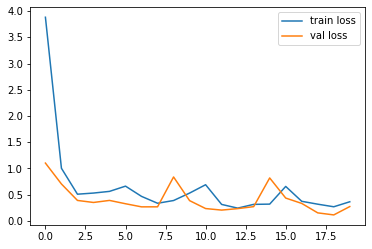

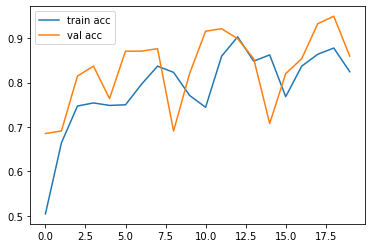

<Figure size 432x288 with 0 Axes>

In [14]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# saving model as a h5 file

model.save('model_resnet50.h5')

C:\Users\Lakshita\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [16]:
# Making predictions

y_pred = model.predict(test_set)
y_pred

array([[2.27418870e-01, 3.79385460e-06, 7.72577345e-01],
       [2.42922217e-01, 2.71538564e-04, 7.56806195e-01],
       [9.99973297e-01, 2.32544817e-10, 2.66729312e-05],
       [9.81032281e-05, 9.99895096e-01, 6.80777839e-06],
       [9.76282179e-01, 1.64334290e-02, 7.28434557e-03],
       [9.85525429e-01, 2.30773439e-05, 1.44515261e-02],
       [9.76591587e-01, 4.55480546e-07, 2.34080292e-02],
       [5.46122720e-08, 1.00000000e+00, 4.52473198e-10],
       [2.38643602e-01, 8.78610881e-04, 7.60477722e-01],
       [9.98808503e-01, 2.36283358e-05, 1.16787746e-03],
       [1.09760030e-07, 9.99999762e-01, 7.55675131e-08],
       [7.38059521e-01, 1.34980056e-07, 2.61940330e-01],
       [7.86237919e-09, 1.00000000e+00, 2.39226056e-10],
       [8.35851490e-01, 4.76644782e-04, 1.63671836e-01],
       [3.05254322e-10, 1.00000000e+00, 3.41772617e-11],
       [1.87946811e-01, 3.31238402e-06, 8.12049866e-01],
       [9.97863472e-01, 5.89691762e-09, 2.13655969e-03],
       [1.99007597e-02, 2.93678

In [17]:
#Loading Model 
model=load_model('model_resnet50.h5')

In [18]:
# making prediction

img=image.load_img('Images Data/Test/Saree/Saree53.jpg',target_size=(224,224))

In [19]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 244.],
        [255., 255., 248.],
        [254., 255., 253.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 249., 239.],
        [255., 254., 248.],
        [255., 255., 253.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 253., 243.],
        [255., 253., 246.],
        [255., 2

In [20]:
x.shape

(224, 224, 3)

In [21]:
x=x/255

In [22]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [23]:
#model predictions

model.predict(img_data)

array([[1.0094053e-01, 8.9905947e-01, 1.7546408e-12]], dtype=float32)

In [24]:
a=np.argmax(model.predict(img_data), axis=1)

In [25]:
a==1

array([ True])

## Transfer Learning Inception V3 using Keras

In [26]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [27]:
# re-sizing all the images

IMAGE_SIZE = [224, 224]

train_path = 'Images Data/Train'
valid_path = 'Images Data/Test'

In [28]:
#adding preprocessing layer to the front of VGG

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
for layer in inception.layers:
    layer.trainable = False

In [30]:
# useful for getting number of output classes
folders = glob('Images Data/Train/*')

In [31]:
# our layers
x = Flatten()(inception.output)

In [32]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=inception.input, outputs=prediction)

In [33]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [34]:
# Cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [35]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
# Rescaling training images 

training_set = train_datagen.flow_from_directory('Images Data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

Found 712 images belonging to 3 classes.


In [38]:
# Rescaling testing images 

test_set = test_datagen.flow_from_directory('Images Data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 178 images belonging to 3 classes.


In [39]:
# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Lakshita\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
23/23 [==============================] - 162s 6s/step - loss: 1.8149 - accuracy: 0.7500 - val_loss: 0.5680 - val_accuracy: 0.8764
Epoch 2/20
23/23 [==============================] - 195s 9s/step - loss: 0.2959 - accuracy: 0.9284 - val_loss: 0.2210 - val_accuracy: 0.9438
Epoch 3/20
23/23 [==============================] - 177s 7s/step - loss: 0.1803 - accuracy: 0.9466 - val_loss: 0.2280 - val_accuracy: 0.9157
Epoch 4/20
23/23 [==============================] - 158s 7s/step - loss: 0.1902 - accuracy: 0.9480 - val_loss: 0.0786 - val_accuracy: 0.9719
Epoch 5/20
23/23 [==============================] - 195s 9s/step - loss: 0.1072 - accuracy: 0.9775 - val_loss: 0.0581 - val_accuracy: 0.9607
Epoch 6/20
23/23 [==============================] - 169s 7s/step - loss: 0.5082 - accuracy: 0.9003 - val_loss: 0.0842 - val_accuracy: 0.9663
Epoch 7/20
23/23 [==============================] - 166s 7s/step - loss: 0.0782 - accuracy: 0.9747 - val_loss: 0.0106 - val_accuracy: 0.9944
Epoch 8/20
23

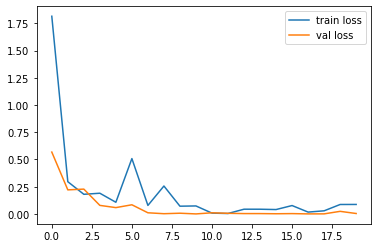

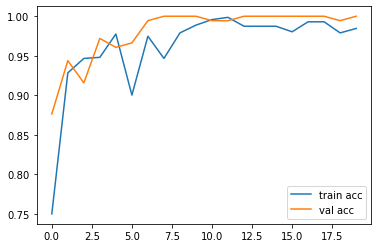

<Figure size 432x288 with 0 Axes>

In [40]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [41]:
# saving it as a h5 file

model.save('model_inception.h5')

In [42]:
# making predictions

y_pred = model.predict(test_set)

In [43]:
y_pred

array([[2.32069941e-09, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.53999749e-05, 0.00000000e+00, 9.99964595e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.11700953e-22, 4.09888012e-10],
       [1.00000000e+00, 0.00000000e+00, 3.91914487e-11],
       [6.77530957e-21, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.45233252e-11],
       [1.00000000e+00, 0.00000000e+00, 6.01085404e-09],
       [5.76866723e-12, 0.00000000e+00, 1.00000000e+00],
       [7.59147316e-14, 0.00000000e+00, 1.00000000e+00],
       [1.24829056e-15, 1.97484275e-37, 1.00000000e+00],
       [3.32042011e-17, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.57935979e-13],
       [9.99999285e-01, 0.00000000e+00, 7.69809674e-07],
       [3.74416366e-11, 0.00000000e+00, 1.00000000e+00],
       [1.01049545e-06, 0.00000000e+00, 9.99999046e-01],
       [0.00000000e+00, 1.00000

In [44]:
# making predictions
y_pred = np.argmax(y_pred, axis=1)

In [45]:
y_pred

array([2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1,
       1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0,
       1, 1], dtype=int64)

In [46]:
# loading our saved model 
model=load_model('model_inception.h5')

In [47]:
# loading test image to make predictions

img=image.load_img('Images Data/Test/Trousers/Trousers(Men)0.jpg',target_size=(224,224))

In [48]:
x=image.img_to_array(img)
x

array([[[239., 239., 251.],
        [198., 198., 210.],
        [198., 198., 210.],
        ...,
        [254., 255., 255.],
        [254., 255., 255.],
        [254., 255., 255.]],

       [[252., 252., 255.],
        [152., 152., 164.],
        [152., 152., 164.],
        ...,
        [249., 250., 255.],
        [249., 250., 255.],
        [254., 255., 255.]],

       [[254., 254., 255.],
        [151., 151., 161.],
        [151., 151., 161.],
        ...,
        [244., 245., 250.],
        [244., 245., 250.],
        [254., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [49]:
x.shape

(224, 224, 3)

In [50]:
x=x/255

In [51]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
# making predictions on the test image

model.predict(img_data)

array([[5.4156218e-10, 9.9999988e-01, 1.1050555e-07]], dtype=float32)

In [53]:
a=np.argmax(model.predict(img_data), axis=1)

In [54]:
a==0

array([False])